# CPSC380: Program 3 - Numpy Applications

There are two parts in this programming assignment: 
- Part A (ten tasks): each task is worth 1 point
- Part B (one task): it is worth 3 points

### Submission Instruction:
- Electronic submission: upload this jupyter notebook on d2l
- In-class demo:
 - Run this jupyter notebook on your laptop.
 - Answer the questions if requested.

## Part A: Numpy Basics

### 1. Sigmoid function

$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="images/Sigmoid.png" style="width:500px;height:228px;">

#### Question 1: 
Implement the sigmoid function using numpy. 

**Hint**: use `np.exp()`. 

See np.exp documentation: (https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html). 


In [56]:
import numpy as np

def question_one(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- the sigmoid of x 
    """
    
    ### START CODE HERE ###
    #Replace None with your code
# The np.exp() function in numpy returns 
# exponential of elements in the input 
# array.
# np.exp() lets us net have to implement e
# the sigmoid function in just one line of code.
#sigma(x) = frac{1}{1 + e^{-x}}
    s = 1 / (1 + np.exp(-x))
    return s
    ### END CODE HERE ###

# do not change the code below  



x = np.array([1, 2, 3])
question_one(x)

array([0.73105858, 0.88079708, 0.95257413])

**Expected Output**: 
<table>
    <tr> 
        <td> array([ 0.73105858,  0.88079708,  0.95257413]) </td> 
    </tr>
</table> 


### 2. Reshaping arrays ###

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

<img src="images/image2vector_kiank.png" style="width:500px;height:300;">



#### Question 2: 

Implement `question_two()` that takes an input of an image with the shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1).

In [57]:
def question_two(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    ### START CODE HERE ### 
    #Replace None with your code
    #v -- a vector of shape (length*height*depth, 1)
    #use static sizing
    #v = image.reshape(image.shape[0]*image.shape[1]*3, 1)
    #use dynamic sizing
    v = image.reshape(image.size, 1)
    return v
    ### END CODE HERE ###

# do not change the code below  
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print (str(question_two(image)))

[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


**Expected Output**: 


<table style="width:100%">
     <tr>
       <td> [[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]</td> 
     </tr> 
</table>

### 3. Normalizing rows

Row normalization means that changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{2} $$

then $$\| x\| = \begin{bmatrix}
    \sqrt{0^{2}+3^{2}+4^{2}} \\
    \sqrt{2^{2}+6^{2}+4^{2}}\\
\end{bmatrix} = \begin{bmatrix}
     5 \\
     \sqrt{56} \\
\end{bmatrix}\tag{3} $$
and        

$$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{4}$$ 

**Note:** You can divide matrices of different sizes and it works fine: this is broadcasting!



#### Question 3: 

Implement question_three() to normalize the rows of a matrix as illustrated above, so that each row of x should be a vector of unit length (meaning length 1).

Hint:
 - Use `np.linalg.norm` to compute  $\| x\|$
 - Divide x by its norm.

In [58]:
def question_three(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix.
    """
    
    ### START CODE HERE ### (≈ 3 lines of code)
    # Replace None with your code
    # row normalization would be way more then one line of code
    # This would be more complex without np.linalg.norm(array , ord = #, axis = 0|1, keepdims = True|False)
    # This is a two step process, this calculates and stores te norm
    x_norm = np.linalg.norm(x, ord = 2, axis = 1, keepdims = True)
    
    # then we actually divide x by its norm.
    x = x / x_norm
    
    # then we return the array wit normalized values    
    return x
    ### END CODE HERE ###

# do not change the code below  
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print(str(question_three(x)))

[[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


**Expected Output**: 

<table style="width:60%">
     <tr> 
       <td> [[ 0.          0.6         0.8       ] 
       [ 0.13736056  0.82416338  0.54944226]]</td> 
     </tr>
    
   
</table>

### 4. Softmax function ####
A softmax function can be defined as the followings:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

#### Question 4: 

Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes. You will learn more about softmax in the second course of this specialization.

**Hint**:
 - Apply `exp()` element-wise to x. Use `np.exp(...)`.
 - Create a vector `x_sum` that sums each row of `x_exp`. Use `np.sum(..., axis = 1, keepdims = True)`.
 - Compute `softmax(x)` by dividing `x_exp` by `x_sum`. It should automatically use numpy broadcasting.

In [59]:
def question_four(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (n, m).

    Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (n,m)
    """
    
    ### START CODE HERE ### (≈ 3 lines of code)
    # replace None with your code
    
    # Apply exp() element-wise to x. Use np.exp(...).
    x_exp = np.exp(x)

    # Create a vector x_sum that sums each row of x_exp. Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)
    
    # Compute softmax(x) by dividing x_exp by x_sum. It should automatically use numpy broadcasting.
    s = x_exp/x_sum

    ### END CODE HERE ###
    
    return s

# do not change the code below  
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print(str(question_four(x)))

[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


**Expected Output**:

<table style="width:90%">
     <tr> 
       <td> [[  9.80897665e-01   8.94462891e-04   1.79657674e-02 1.21052389e-04 1.21052389e-04] 
             [ 8.78679856e-01   1.18916387e-01   8.01252314e-04   8.01252314e-04 8.01252314e-04]]</td> 
     </tr>
</table>


###  5. L1 loss function

L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{5}$$

#### Question 5: 
Implement the numpy vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.


In [60]:
def question_five(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L1 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    # np.sum() to get summation of the resulting array using np.sum()
    # np.abs() to get the absolute value of the difference between y and yhat
    # sum is then stored in loss
    loss = np.sum(np.abs(y-yhat))
    
    ### END CODE HERE ###
    
    return loss

# do not change the code below  
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array(   [1,    0,    0, 1,  1])
print("L1 = " + str(question_five(yhat,y)))


L1 = 1.1


**Expected Output**:

<table>
    <tr> 
         <td> **L1** </td> 
         <td> 1.1 </td> 
    </tr>
</table>



###  6. L2 loss function

L2 loss is defined as :
$$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{6}$$

#### Question 6: 
Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful. As a reminder, if $x = [x_1, x_2, ..., x_n]$, then `np.dot(x,x)` = $\sum_{j=0}^n x_j^{2}$. 



In [61]:
def question_six(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    # np.sum() to get summation of the resulting array using np.sum()
    # np.square() to get the square of the difference between y and yhat
    # sum is then stored in loss 
    # lossALT = np.sum(np.square((y-yhat)))
    # np.dot can do the same summation, difference, and exponents 
    # needed for this equation all in one function 
    loss = np.dot((y-yhat),(y-yhat))
    ### END CODE HERE ###
    
    return loss

# do not change the code below  
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(question_six(yhat,y)))

L2 = 0.43


**Expected Output**: 
<table style="width:20%">
     <tr> 
       <td> **L2** </td> 
       <td> 0.43 </td> 
     </tr>
</table>

### 7. Prediction accuracy

Accuracy is defined as :
$$\begin{align*} & Accuracy = \frac{Number\_of\_corrected\_predictions}{Total\_number\_of\_predictions} = \frac{\sum_{i=0}^m(y^{(i)} == \hat{y}^{(i)})}{m}\end{align*}\tag{7}$$

where $m$ is the total number of predictions.

#### Question 7
Implement the numpy vectorized version solution for computing accuracy.

In [62]:
def question_seven(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    accuracy -- the value of prediction accuracy defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    # if we want matches on 1's and 0's
    #   this gives 0.33333...
    # accuracy = (np.sum((yhat == y)))/len((y[0]))
    # if we only want matches on 1's
    #   this gives 0.25
    accuracy = (np.sum((yhat == y) & (y != 0)))/len((y[0]))
    return accuracy
    ### END CODE HERE ###

# do not change the code below  
y = np.array([   [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]])
yhat = np.array([[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]])
question_seven(yhat, y)

0.25

**Expected Output**: 
<table style="width:20%">
     <tr> 
       <td> **Accuracy** </td> 
       <td> 0.25 </td> 
     </tr>
</table>

### 8. Vectorization with NumPy

Python we can multiply two sequences with a list comprehension (or loop), but it is extremly slow when input seuqence is large. However, it is fairly efficient if we perform the same task (elementwise multiplication) with numpy array.

#### Question 8
Implement the numpy vectorized version solution for computing elementwise multiplication.

In [63]:
# non-vectorized version of vector multiplication
a = [np.random.randint(1, 100) for _ in range(1000000)]
b = [np.random.randint(1, 100) for _ in range(1000000)]
%timeit res = [x * y for x, y in zip(a, b)]

115 ms ± 9.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
import numpy as np
import timeit 
# vectorized
def question_eight(a, b):

    """
    Arguments:
    a -- vector of randomly generated numbers
    b -- vector of randomly generated numbers
    
    Returns:
    record execution time for elementwise vector multiplication
    """    
    ### START CODE HERE ### (≈ 1 line of code)  
    %timeit res = np.multiply(a,b)
    ### END CODE HERE ###

# do not change the code below  
a = np.random.randint(1, 100, 1000000)
b = np.random.randint(1, 100, 1000000)
question_eight(a, b)

2.34 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 9. Dataset processing

**Note**: The dataset is used for both question 9 and question 10

You are given a data set in `prog3data.mat` that contains 5000 training examples of handwritten digits (This is a subset of the [MNIST](http://yann.lecun.com/exdb/mnist) handwritten digit dataset). The `.mat` format means that that the data has been saved in a native Octave/MATLAB matrix format, instead of a text (ASCII) format like a csv-file. Python provides mechanisms to load MATLAB native format using the `loadmat` function within the `scipy.io` module. This function returns a python dictionary with keys containing the variable names within the `.mat` file. 

There are 5000 training examples in `prog3data.mat`, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix `X`. This gives us a 5000 by 400 matrix `X` where every row is a training example for a handwritten digit image.

$$ X = \begin{bmatrix} - \: (x^{(1)})^T \: - \\ -\: (x^{(2)})^T \:- \\ \vdots \\ - \: (x^{(m)})^T \:-  \end{bmatrix} $$

The second part of the training set is a 5000-dimensional vector `y` that contains labels for the training set. 

In the following cell, we will load the dataset. Execute the cell below, you do not need to write any code here.

In [65]:
import collections

# used to load MATLAB mat datafile format
from scipy.io import loadmat

# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat('prog3data.mat')
X, y = data['X'], data['y'].ravel()

print ('Shape of X: ', X.shape)
print ('Shape of y: ', y.shape,'\n')

print ('Data label information:')
print ('Before: ', collections.Counter(y))

Shape of X:  (5000, 400)
Shape of y:  (5000,) 

Data label information:
Before:  Counter({10: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500})


Below shows four digit images (0,1,2,3) and their corresponding labels.

**Note**: The zero digit was labeled as 10 in this dataset This is an artifact due to the fact that this dataset was used in MATLAB where there is no index 0

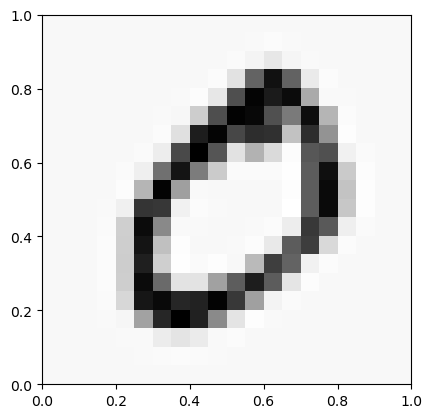

Corresponding label 10 




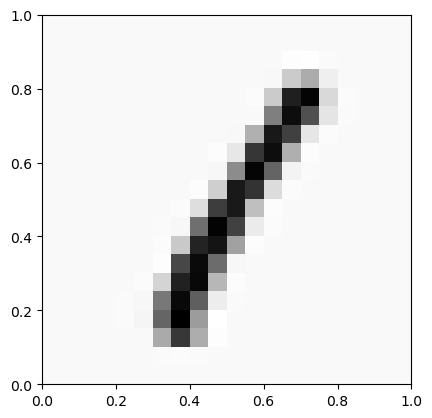

Corresponding label 1 




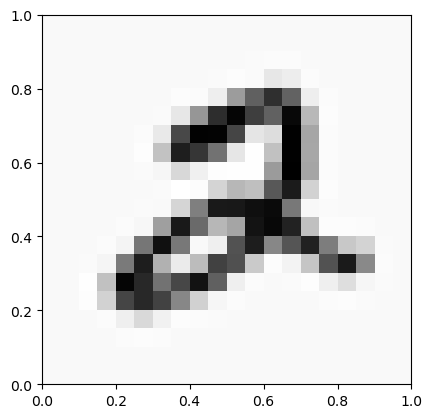

Corresponding label 2 




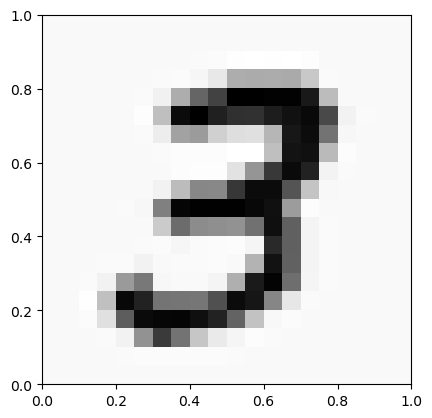

Corresponding label 3 




In [66]:
from matplotlib import pyplot

# displaying digit images (0,1,2,3)
for i in range(0, 2000, 500):
    pyplot.imshow(X[i].reshape(20, 20, order='F'), cmap='Greys', extent=[0, 1, 0, 1])
   
    pyplot.show()
    print ('Corresponding label', y[i],'\n\n')


#### Question 9
Set the zero digit to 0, rather than its mapped 10 in this dataset

In [67]:
def question_nine(y):
    """
    Arguments:
    y -- vector of digit image labels (10, 1,2,3,...9)
    """
    ### START CODE HERE ###
    # replace all original label of 10 with 0
    # anywhere y = 10, make it 0 now
    # we don't' want to return y since we want
    # to mutate the original y
    y[y==10] = 0
    ### END CODE HERE ###
# do not change the code below    
question_nine(y)
print ('After: ', collections.Counter(y))

After:  Counter({0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500})


**Expected Output**: 
<table style="width:80%">
     <tr> 
       <td> After:  Counter({0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500})
 </td> 
     </tr>
</table>

#### Question 10

Randomly select 25 index positions out of `m` data points so indices must be in range of `[0, m-1]`, and return the chosen index list.

**Hint**:
 - use `np.random.choice` with replacement strategy of `False`

In [68]:
def question_ten(m):

    np.random.seed(0)
    
    ### START CODE HERE ###
    
    # Randomly select 25 index positions out of m (i.e., 5000) data points
    # replace None with your code
    # np.random.choice() takes m, selects 25 elements, but leave the unreplaced or the same
    rand_indices = np.random.choice(m, 25, replace=False)  
    # return the slice of 25 random index positions
    # same as the example since it uses the same seed
    return rand_indices
    
    ### END CODE HERE ###

# do not change the code below
m = y.size
question_ten(m)

array([ 398, 3833, 4836, 4572,  636, 2545, 1161, 2230,  148, 2530, 4070,
       1261, 4682,  333,  906, 3170,  483, 2825, 1778, 2466,  159, 1563,
        402, 4258, 4775])

**Expected Output**: 
<table style="width:80%">
     <tr> 
       <td> array([ 398, 3833, 4836, 4572,  636, 2545, 1161, 2230,  148, 2530, 4070,
       1261, 4682,  333,  906, 3170,  483, 2825, 1778, 2466,  159, 1563,
        402, 4258, 4775])</td> 
     </tr>
</table>

### 10. Visualizing the data

We will visualize a subset of the training set based on randomly selected indices from `question_ten()`. Below is the `displayData` function implemented for you. This function maps each row to a 20 pixel by 20 pixel grayscale image and displays the images together. Using  the `displayData` function, we can see the 25 randomly selcted images we picked.

**Note**: You don't need do anything in this section, but you may run the cells below to double check whether you picked the correct indices from `question_ten()`. 

In [69]:
import sys
import numpy as np
from matplotlib import pyplot

def displayData(X, example_width=None, figsize=(5, 5)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


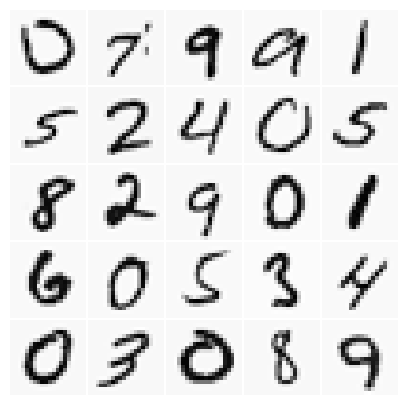

In [70]:
rand_indices = question_ten(m)
sel = X[rand_indices, :]
displayData(sel)

**Expected Output**:

<img src="images/digits.png" style="width:200px;height:200;">

## Part B: Flower Classfication: Training and Testing File


**In this task**, you will need to use the renamed image files (`4317` in total) you completed from program 1 to create two files: `flower_recognition_train.csv` and `flower_recognition_test.csv`. These two files will be used for image model training and testing purpose. Below is the list of detailed information for the file generation:
- The renamed image files
- For each flower folders (`chamomile, tulip, rose, sunflower, daisy`), you randomly pick 60 images for the testing, and the remaining images for the training.
- You should have `5*60` images for model testing, and `4017` (`4317-300`) images for model training.
- Both files should have the headers `,FileName,Label,ClassName`
- We will have the following class label mapping: {`'daisy':0,'dandelion':1,'rose':2,'sunflower':3,'tulip':4`}
- For each record in both training and testing file, we will have four items separated with `,` (**csv format**):
`index,image_file_path/image_file_name,class_mapping, class`


Below is the list of files from `flower_recognition_train.csv`:

   
    ,FileName,Label,ClassName
    0,/home/dche/Course/CPSC380/flowers/tulip/tulip_000849.png,4,tulip
    1,/home/dche/Course/CPSC380/flowers/tulip/tulip_000587.png,4,tulip
    2,/home/dche/Course/CPSC380/flowers/tulip/tulip_000302.png,4,tulip
    ...
    923,/home/dche/Course/CPSC380/flowers/tulip/tulip_000798.png,4,tulip
    924,/home/dche/Course/CPSC380/flowers/daisy/daisy_000632.png,0,daisy
    925,/home/dche/Course/CPSC380/flowers/daisy/daisy_000267.png,0,daisy
    926,/home/dche/Course/CPSC380/flowers/daisy/daisy_000381.png,0,daisy
    ...
    4015,/home/dche/Course/CPSC380/flowers/rose/rose_000704.png,2,rose
    4016,/home/dche/Course/CPSC380/flowers/rose/rose_000683.png,2,rose
   
    
 **Note**: Depending on how you write image file information into the file, your file may not have the same order as mine.

In [71]:

#################################################################################################################################################################
#-                                                          MUST DO:                                                                                            #
#- The renamed image files                                                                                                                                      # 
#- For each flower folders (`chamomile, tulip, rose, sunflower, daisy`), you randomly pick 60 images for the testing, and the remaining images for the training.#
#- You should have `5*60` images for model testing, and `4017` (`4317-300`) images for model training.                                                          #
#- Both files should have the headers `,FileName,Label,ClassName`                                                                                               #
#- We will have the following class label mapping: {`'daisy':0,'dandelion':1,'rose':2,'sunflower':3,'tulip':4`}                                                 #
#- For each record in both training and testing file, we will have four items separated with `,` (**csv format**):                                              # 
#- index,image_file_path/image_file_name,class_mapping, class`                                                                                                  #
#- Match given cvs output                                                                                                                                       #
#################################################################################################################################################################  

# your code below
import os
import random
import csv

# set the path to the flowers dataset directory
data_dir = 'D:\\GitHub\\DataScienceTermProject\\Program3\\flowers\\flowers'
# define the class label mapping
class_map = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
# define number of test images
num_test_images = 60
# create empty lists for training and testing data
train_data = []
test_data = []
# iterate over the flower folders
for class_name in os.listdir(data_dir):
    #combine the subdirectory with the path we already have
    class_path = os.path.join(data_dir, class_name)
    #double check that what we are looking for exists
    if os.path.isdir(class_path):
        #turn files into a list called images
        images = os.listdir(class_path)
        #shuffle the image list to randomly select testing and training images
        # this shuffles files by file number
        random.shuffle(images)
        # otherwise the split would just be the first 60 of each for testing, the rest training
        # select the first num_test_images for testing, 
        test_images = images[:num_test_images]
        # select the rest for training
        train_images = images[num_test_images:]
        # iterate over the testing images
        for image_file in test_images:
            # select file and append to path
            image_path = os.path.join(class_path, image_file)
            # label equals the one the class name is mapped to from before
            label = class_map[class_name]
            # append image path, the label, and the class name for later writing
            test_data.append((image_path, label, class_name))
        # iterate over the training images
        for image_file in train_images:
            # select file and append to path
            image_path = os.path.join(class_path, image_file)
            # label equals the one the class name is mapped to from before
            label = class_map[class_name]
            # append image path, the label, and the class name for later writing
            train_data.append((image_path, label, class_name))
# Write the training data to a CSV file
    # create and open a new csv file for writing, called my_csv for simplicity
with open('flower_recognition_train.csv', 'w', newline='') as my_csv:
    # create a writer object for the newly made file
    writer = csv.writer(my_csv)
    # writerow will now right the top row of the csv
    writer.writerow(['', 'FileName', 'Label', 'ClassName'])
    # enumerate over train data and store the index, and values needed
    for i, (image_path, label, class_name) in enumerate(train_data):
        # writerow will now right all the entries from train_data to the new csv 
        writer.writerow([i, image_path, label, class_name])

# Write the testing data to a CSV file
    # create and open a new csv file for writing, called my_csv for simplicity
with open('flower_recognition_test.csv', 'w', newline='') as my_csv:
    # create a writer object for the newly made file
    writer = csv.writer(my_csv)
    # writerow will now right the top row of the csv
    writer.writerow(['', 'FileName', 'Label', 'ClassName'])
    # enumerate over train data and store the index, and values needed
    for i, (image_path, label, class_name) in enumerate(test_data):
        # writerow will now right all the entries from train_data to the new csv 
        writer.writerow([i, image_path, label, class_name])
        
            #####################################################
            # Now check file's directory for the two csv files! #
            #####################################################